**1. Install dependencies | Instalar dependencias**

In [ ]:
!pip install -q transformers torch matplotlib pandas langdetect

**2. Define the Messages based on the specific language used in the file**

The model `nlptown/bert-base-multilingual-uncased-sentiment` has been trained to understand and process the following languages, which enables the model to perform sentiment analysis across multiple languages:
*   English
*   Dutch
*   German
*   French
*   Italian
*   Spanish

Update the variable `MESSAGES` with the desired text or add new languages.

In [ ]:
MESSAGES = {
    'en': {
        'loaded': '✅ Notes loaded.',
        'loading_model': '🧠 Loading multilingual sentiment model...',
        'analyzing': '🔍 Analyzing sentiment...',
        'preview': '📋 Sample results:',
        'df_note': 'Note',
        'df_star': 'Star',
        'df_score': 'Score',
        'df_sentiment': 'Sentiment',
        'positive_score': 'Positive',
        'neutral_score': 'Neutral',
        'negative_score': 'Negative',
        'exported': '📁 File exported: retro.csv',
        'chart_title': 'Sentiment Distribution',
        'x_label': 'Sentiment',
        'y_label': 'Number of notes',
    },
    'es': {
        'loaded': '✅ Notas cargadas.',
        'loading_model': '🧠 Cargando modelo multilingüe de sentimiento...',
        'analyzing': '🔍 Analizando sentimientos...',
        'preview': '📋 Muestra de resultados:',
        'df_note': 'Nota',
        'df_star': 'Estrella',
        'df_score': 'Puntos',
        'df_sentiment': 'Sentimiento',
        'positive_score': 'Positivo',
        'neutral_score': 'Neutral',
        'negative_score': 'Negativo',
        'exported': '📁 Archivo exportado: retro.csv',
        'chart_title': 'Distribución de Sentimientos',
        'x_label': 'Sentimiento',
        'y_label': 'Cantidad de notas',
    }
}


**2. Upload your file in `.txt` format.**

The file must contain a white line between notes. This block reads the file, and prepares the content for analysis.

In [ ]:
from google.colab import files
from langdetect import detect
import matplotlib.pyplot as plt
import pandas as pd
from transformers import pipeline

uploaded = files.upload()

filename = list(uploaded.keys())[0]

with open(filename, encoding='utf-8') as f:
    lines = [line.strip() for line in f if line.strip()]

# Detect language
sample_text = ' '.join(lines[:5])
language = detect(sample_text)
msgs = MESSAGES.get(language, MESSAGES['en'])


print(f"{msgs['loaded']}: {len(lines)}")


Saving retro2.txt to retro2.txt
✅ Notes loaded.: 20


**3. Load the sentiment analysis model, and analyze the imported lines**

In [ ]:
print(msgs['loading_model'])
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

print(msgs['analyzing'])
results = classifier(lines)

print(results)

🧠 Loading multilingual sentiment model...


Device set to use cpu


🔍 Analyzing sentiment...
[{'label': '5 stars', 'score': 0.6202268600463867}, {'label': '1 star', 'score': 0.5669248104095459}, {'label': '4 stars', 'score': 0.4956530034542084}, {'label': '2 stars', 'score': 0.5217221975326538}, {'label': '5 stars', 'score': 0.49541887640953064}, {'label': '2 stars', 'score': 0.41643473505973816}, {'label': '5 stars', 'score': 0.4670548737049103}, {'label': '2 stars', 'score': 0.3708787262439728}, {'label': '4 stars', 'score': 0.4436158537864685}, {'label': '2 stars', 'score': 0.48309943079948425}, {'label': '4 stars', 'score': 0.4162013530731201}, {'label': '2 stars', 'score': 0.3991352617740631}, {'label': '5 stars', 'score': 0.4354078769683838}, {'label': '3 stars', 'score': 0.35140496492385864}, {'label': '3 stars', 'score': 0.433772474527359}, {'label': '2 stars', 'score': 0.44116804003715515}, {'label': '4 stars', 'score': 0.48660555481910706}, {'label': '1 star', 'score': 0.5116708874702454}, {'label': '4 stars', 'score': 0.3926796019077301}, {'

**4. Process the results**

In [ ]:
df = pd.DataFrame({
    msgs['df_note']: lines,
    msgs['df_star']: [r['label'] for r in results],
    msgs['df_score']: [r['score'] for r in results]
})

# Convert tags to ratings (1 to 5 stars)
df[msgs['df_star']] = df[msgs['df_star']].str.extract(r'(\d)').astype(int)

**5. Categorize feelings based on punctuation**

In [ ]:
def categorize(n):
    if n <= 2:
        return msgs['negative_score']
    elif n == 3:
        return msgs['neutral_score']
    else:
        return msgs['positive_score']

df[msgs['df_sentiment']] = df[msgs['df_star']].apply(categorize)

print(msgs['preview'])
print(df.head())


📋 Sample results:
                                                Note  Star     Score Sentiment
0  Great collaboration between frontend and backe...     5  0.620227  Positive
1       Poorly defined user stories caused confusion     1  0.566925  Negative
2         Daily standups were concise and productive     4  0.495653  Positive
3   Too many last-minute changes to the sprint scope     2  0.521722  Negative
4    The new QA process helped us catch bugs earlier     5  0.495419  Positive


**6. Visualize the results**

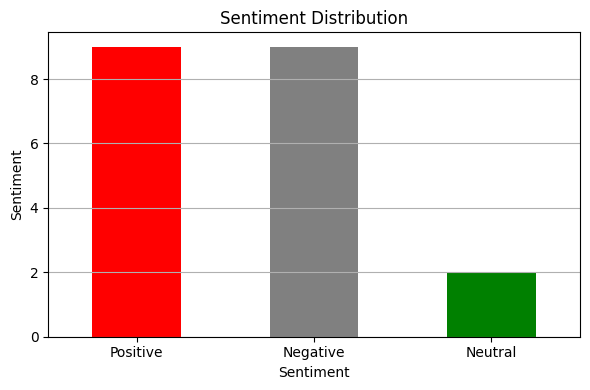

In [ ]:
plt.figure(figsize=(6, 4))
df[msgs['df_sentiment']].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])
plt.title(msgs['chart_title'])
plt.xlabel(msgs['x_label'])
plt.ylabel(msgs['x_label'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Export the results**

In [ ]:
df.to_csv('retro_analysis.csv', index=False)
print('📁 Archivo exportado: retro_analysis.csv')

📁 Archivo exportado: retro_analysis.csv
